# Installing and importing Dependencies

In [47]:
!pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable


In [48]:
!pip install tensorflow-io

Defaulting to user installation because normal site-packages is not writeable


In [49]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio
import scipy.io.wavfile as wavfile
from scipy.signal import resample

# Data Loading

In [56]:
CAPUCHIN_FILE = os.path.join('Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [57]:
CAPUCHIN_FILE

'Parsed_Capuchinbird_Clips\\XC3776-3.wav'

In [58]:
NOT_CAPUCHIN_FILE

'Parsed_Not_Capuchinbird_Clips\\afternoon-birds-song-in-forest-0.wav'

In [59]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels) 
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = resample(wav, int(wav.shape[0] * 16000 / sample_rate))
    return wav

In [60]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

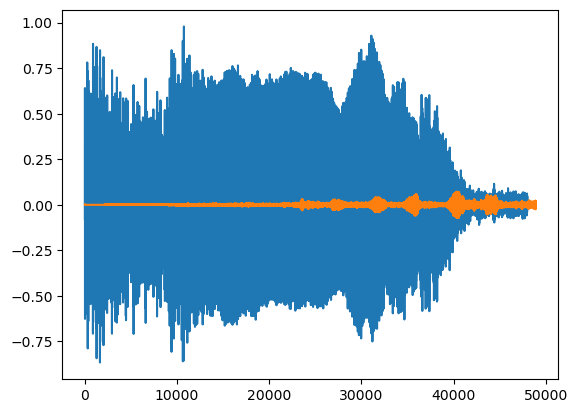

In [61]:
plt.plot(wave)
plt.plot(nwave)
plt.show()

# Creating the dataset 